![](![image.png](attachment:image.png))

![](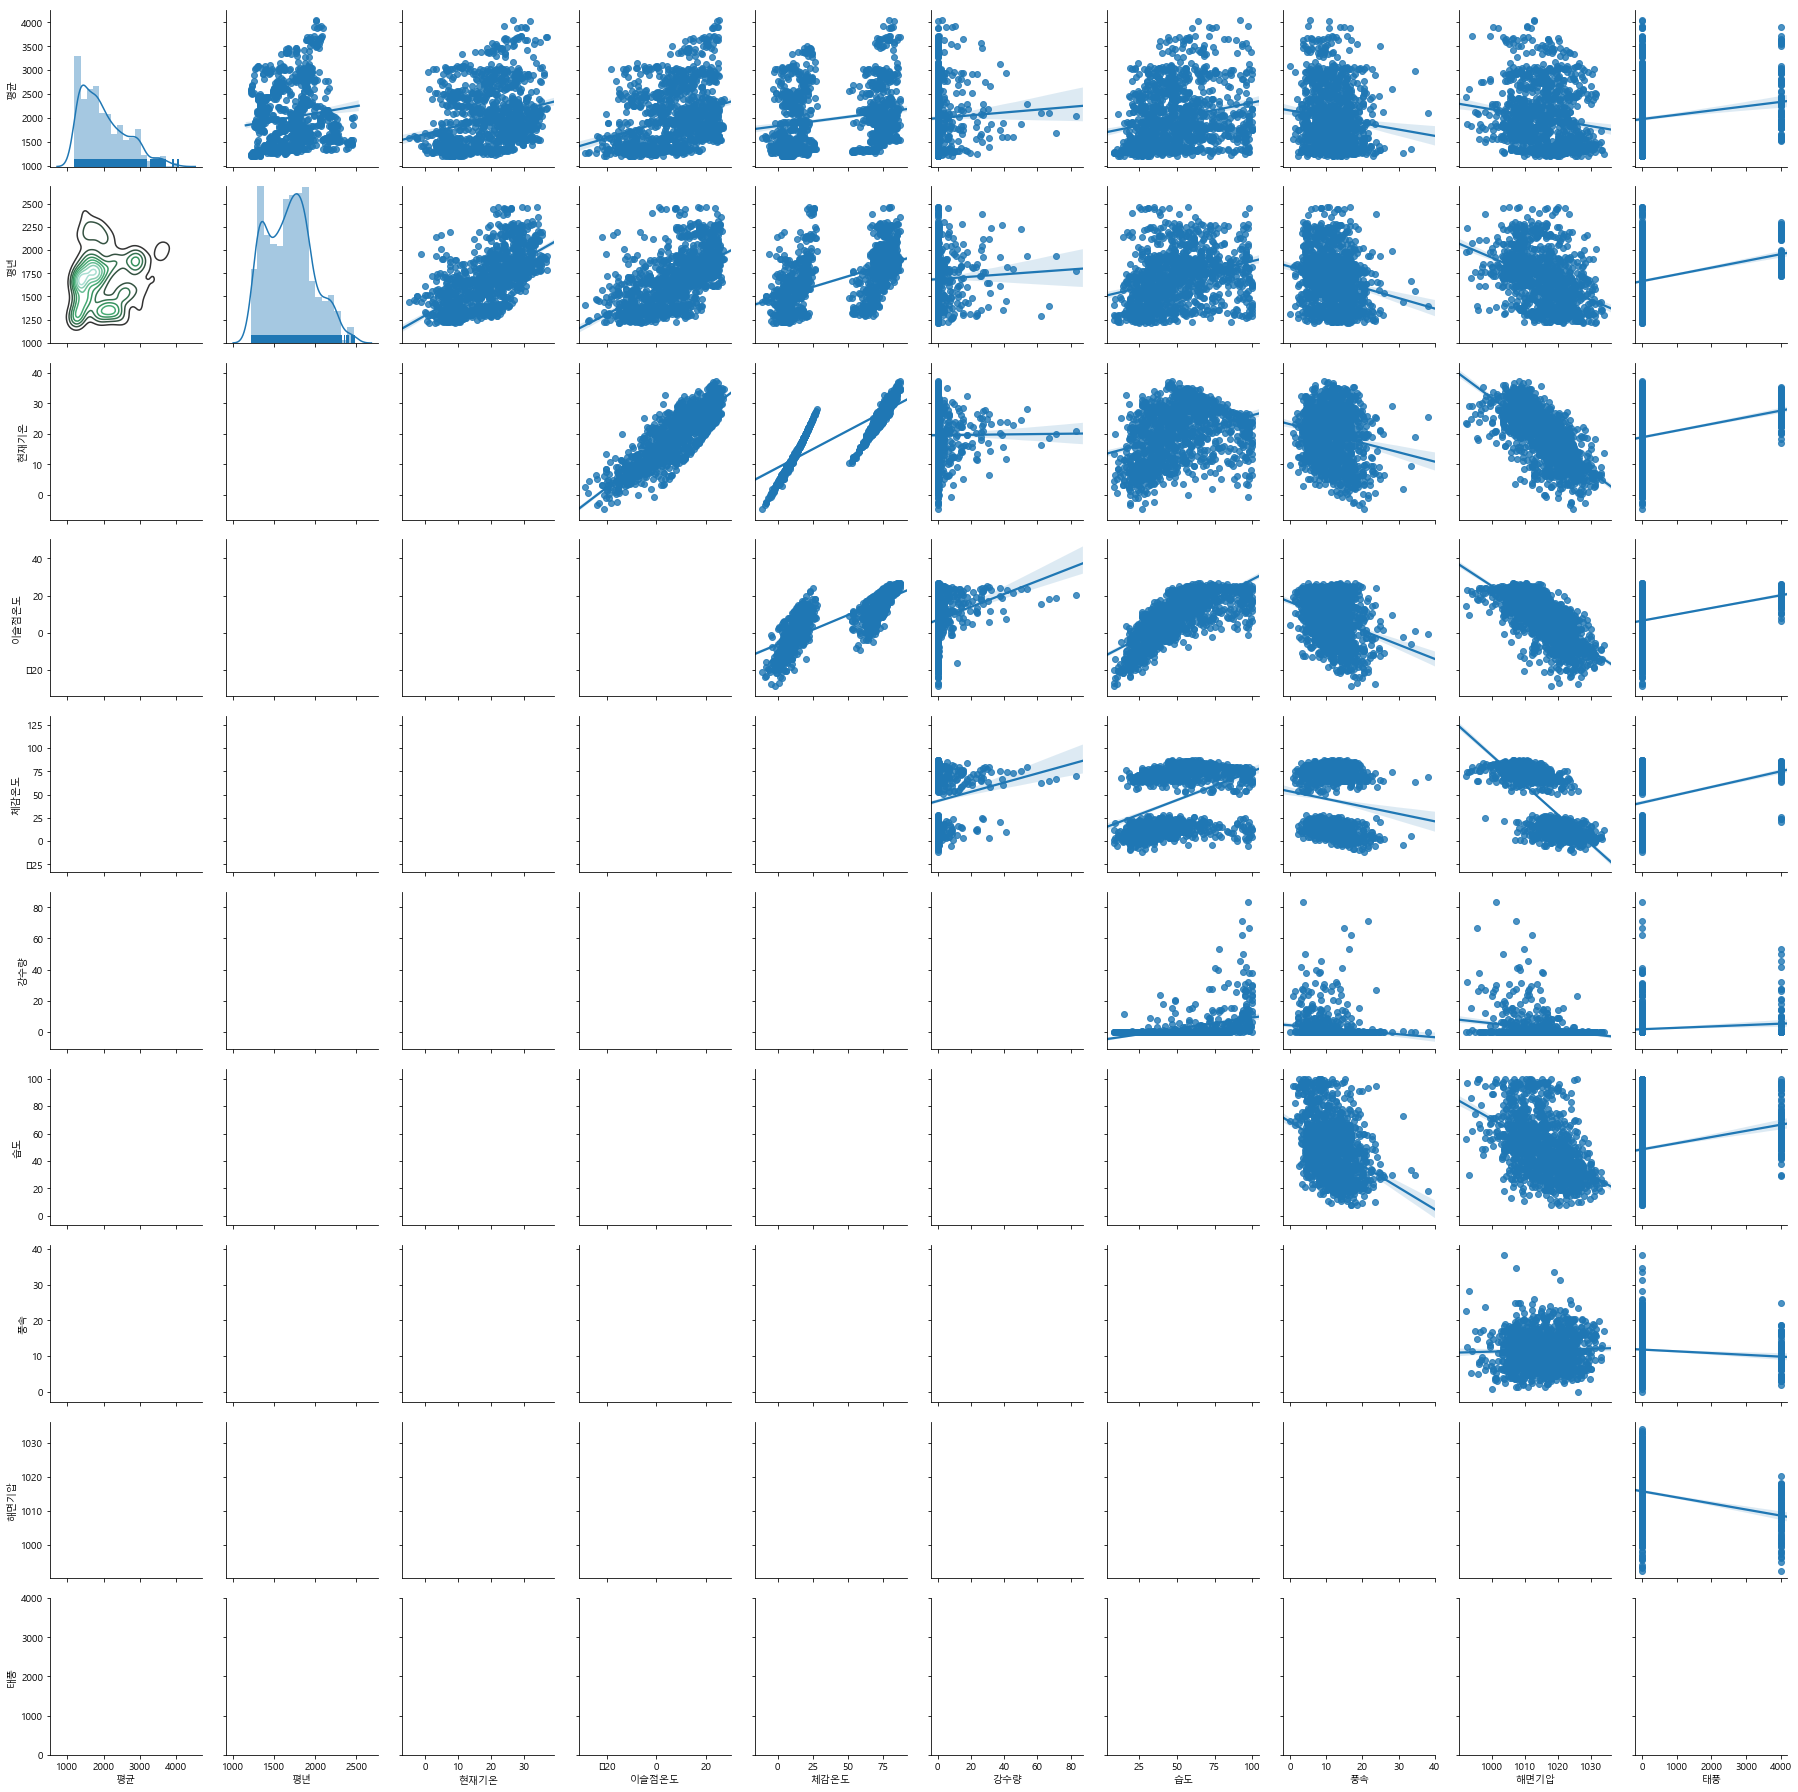%0A)

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 주피터 내장
%matplotlib inline
# 한글처리 
import platform
from matplotlib import font_manager, rc

# 한글처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
#     font_list_mac = fm.OSXInstalledFonts()
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Linux': # 리눅스
    rc( 'font', family='NanumGothic' )
elif platform.system() == 'Windows': # 윈도우
    # 폰트 차후 확인
    # fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family='NanumGothic' )
else:
    print('알수없는 시스템. 미적용')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
moo = pd.read_csv('./output/final_moo.csv')

In [5]:
moo

,평균,평년,현재기온,이슬점온도,체감온도,습도,해면기압,tor20_o,tor20_x
0,1287,1561,2.1,-15.4,-2.3,26.0,1021.4,0,1
1,1287,1449,10.4,-3.3,10.4,38.0,1017.9,0,1
2,1303,1432,9.1,-16.2,6.7,15.0,1011.3,0,1
3,1277,1411,2.5,-28.5,-1.6,8.0,1018.0,0,1
4,1352,1407,3.3,-19.4,-0.1,17.0,1022.8,0,1
...,...,...,...,...,...,...,...,...,...
1183,3073,1618,10.9,-0.5,9.2,45.0,1025.4,0,1
1184,3068,1596,6.1,0.6,3.0,68.0,1012.9,0,1
1185,3022,1582,8.1,-12.3,5.4,22.0,1022.1,0,1
1186,2987,1480,13.3,7.5,12.5,68.0,1019.7,0,1


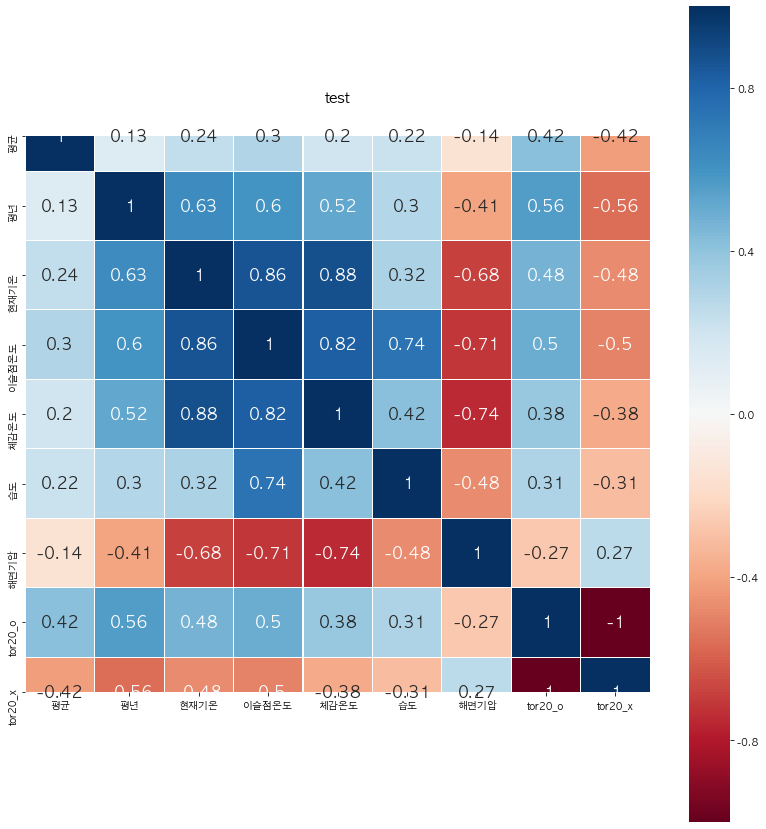

In [6]:
heatmap_data = moo

colormap = plt.cm.RdBu 
plt.figure(figsize=(14, 15))
plt.title('test', y=1.05, size=15)

sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

- 평년 / 현재기온, 습도, 해면기압
- 평균 / 현재기온, 습도, 해면기압

# 야구조 클론!

In [7]:
import warnings
warnings.filterwarnings("ignore")
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from prettytable import PrettyTable

from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
import mglearn

# 안받아져 ...
# from subplot import make_plot

In [8]:
moo = pd.read_csv('./output/final_moo.csv')
moo.head(2)

,평균,평년,현재기온,이슬점온도,체감온도,습도,해면기압,tor20_o,tor20_x
0,1287,1561,2.1,-15.4,-2.3,26.0,1021.4,0,1
1,1287,1449,10.4,-3.3,10.4,38.0,1017.9,0,1


In [9]:
# 결측치 처리
moo.fillna(method='bfill', inplace=True)

data = moo
# del data["이슬점온도"]
# del data["체감온도"]
del data["평균"]

In [10]:
moo.head()

,평년,현재기온,이슬점온도,체감온도,습도,해면기압,tor20_o,tor20_x
0,1561,2.1,-15.4,-2.3,26.0,1021.4,0,1
1,1449,10.4,-3.3,10.4,38.0,1017.9,0,1
2,1432,9.1,-16.2,6.7,15.0,1011.3,0,1
3,1411,2.5,-28.5,-1.6,8.0,1018.0,0,1
4,1407,3.3,-19.4,-0.1,17.0,1022.8,0,1


In [13]:
# y, 타겟 / X, 트레인 데이터
y = data.iloc[:, 0]
X = data.iloc[:, 1:]

# train 데이터와 test 데이터 정의 및 분리
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, shuffle=True)

# 표준화 함수 정의
sc = preprocessing.StandardScaler()

# 데이터를 표준화
sc.fit(X_train)
X_train_std = sc.transform(X_train)
sc.fit(X_test)
X_test_std = sc.transform(X_test)

# 얘는 느리고 정확도 안나옴
# clf_ = linear_model.SGDClassifier() # 

# 실행해볼 리스트
# clf_ = linear_model.LinearRegression(normalize=False) # 0.5 정도 ...
# clf_ = linear_model.Ridge(alpha=.5) # 0.5 정도 ...
# clf_ = linear_model.LassoLars(alpha=.1) # 0.51 정도 ...
# clf_ = RANSACRegressor(random_state=None) # 0.4 정도 ...
# clf_ = linear_model.MultiTaskLasso(alpha=0.1, random_state=None) #  안됨
clf_ = KNeighborsRegressor(n_neighbors=15) # 0.56 정도...
# clf_ = linear_model.Lasso(alpha=0.1,max_iter=5000) # 0.50 정도 ...

# 학습 
# print(X_train.평년)
clf_.fit(X_train, y_train)
y_pred  = clf_.predict(X_test)

print('Mean Squared Error :',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred))
print("train 학습 정확도 :", clf_.score(X_train, y_train)) 
print("test 학습 정확도 :", clf_.score(X_test, y_test)) 

Mean Squared Error : 49639.08746965453
Mean Absolute Error : 173.9370681605976
train 학습 정확도 : 0.5344948086014625
test 학습 정확도 : 0.4257530723496815


# 책에서 하는 후진제거법


In [14]:
import statsmodels.api as sm

In [15]:
pdy = data.iloc[:, 0]
pdx = data.iloc[:, 1:]
x_train,x_test,y_train,y_test=train_test_split(pdx,pdy,train_size=0.3, random_state = 42)
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train,x_train_new)

In [16]:
pdy = data.iloc[:, 0]
pdx = data.iloc[:, 1:]
x_train,x_test,y_train,y_test=train_test_split(pdx,pdy,train_size=0.3, random_state = 42)

In [17]:
# add_constant => 절편변수 생성 / 절편을 만들지 않으면 계수가 달라지게 된다.
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train,x_train_new)

## AIS
#### => 절대수치 상관X / 상대수치가 적을수록 good

## 수정 R제곱
#### => 0.7 이상 good

## 개별변수의 P값 ( P > |t|)
#### => 0.05 이하 good

## 개별변수의 VIF값
#### => 5여야한다. (은행의 경우 2도 사용)

In [18]:
# 독립변수의 R제곱, P값까지 포함한 모델 요약 출력
full_res = full_mod.fit()
print('\n \n', full_res.summary())

# 각 개별 변수의 VIF를 계산
# 각 변수의 R제곱값을 계산, VIF 값으로 변환
print('\n Variance Inflation Factor')
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvars = xvars.pop(i)
    mod = sm.OLS(x_train[yvars], sm.add_constant( x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvars, round(vif, 3))
    

# AIS 
# = 4815
# 수정 R제곱
# = 0.519
# 개별변수의 P값 ( P > |t|)
# = 0.767, tor20_o 삭제처리
# 개별변수의 VIF값
# = 74.665, 이슬점온도 삭제처리



 
                             OLS Regression Results                            
Dep. Variable:                     평년   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     64.83
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           7.69e-54
Time:                        09:23:18   Log-Likelihood:                -2400.5
No. Observations:                 356   AIC:                             4815.
Df Residuals:                     349   BIC:                             4842.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -626.5516   1590.720     -0.394     

In [19]:
del data['이슬점온도']
del data['tor20_o']

In [20]:
pdy = data.iloc[:, 0]
pdx = data.iloc[:, 1:]
x_train,x_test,y_train,y_test=train_test_split(pdx,pdy,train_size=0.3, random_state = 42)
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train,x_train_new)

In [502]:
# 독립변수의 R제곱, P값까지 포함한 모델 요약 출력
full_res = full_mod.fit()
print('\n \n', full_res.summary())

# 각 개별 변수의 VIF를 계산
# 각 변수의 R제곱값을 계산, VIF 값으로 변환
print('\n Variance Inflation Factor')
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvars = xvars.pop(i)
    mod = sm.OLS(x_train[yvars], sm.add_constant( x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvars, round(vif, 3))
    

# AIS 
# = 4815 -> 4813
# 수정 R제곱
# = 0.519 -> 0.520
# 개별변수의 P값 ( P > |t|)
# = 0.767, tor20_o 삭제 -> 0.359, 해면기압 삭제
# 개별변수의 VIF값
# = 74.665, 이슬점온도 삭제 -> 5, 2 정도 값에 머물렀다 안정



 
                             OLS Regression Results                            
Dep. Variable:                     평년   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     77.97
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           8.78e-55
Time:                        21:17:42   Log-Likelihood:                -2400.5
No. Observations:                 356   AIC:                             4813.
Df Residuals:                     350   BIC:                             4836.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -779.0296   2372.142     -0.328     

In [21]:
del data['해면기압']

In [22]:
pdy = data.iloc[:, 0]
pdx = data.iloc[:, 1:]
x_train,x_test,y_train,y_test=train_test_split(pdx,pdy,train_size=0.3, random_state = 42)
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train,x_train_new)

In [23]:
# 독립변수의 R제곱, P값까지 포함한 모델 요약 출력
full_res = full_mod.fit()
print('\n \n', full_res.summary())

# 각 개별 변수의 VIF를 계산
# 각 변수의 R제곱값을 계산, VIF 값으로 변환
print('\n Variance Inflation Factor')
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvars = xvars.pop(i)
    mod = sm.OLS(x_train[yvars], sm.add_constant( x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvars, round(vif, 3))
    

# AIS 
# = 4815 -> 4813
# 수정 R제곱
# = 0.519 -> 0.520
# 개별변수의 P값 ( P > |t|)
# = 0.767, tor20_o 삭제 -> 0.359, 해면기압 삭제
# 개별변수의 VIF값
# = 74.665, 이슬점온도 삭제 -> 5, 2 정도 값에 머물렀다 안정



 
                             OLS Regression Results                            
Dep. Variable:                     평년   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     97.29
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           1.27e-55
Time:                        09:23:41   Log-Likelihood:                -2401.0
No. Observations:                 356   AIC:                             4812.
Df Residuals:                     351   BIC:                             4831.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1400.7258     57.771     24.246     

# 학습해보자  ...

In [69]:
# y, 타겟 / X, 트레인 데이터
y = data.iloc[:, 0]
X = data.iloc[:, 1:]

# train 데이터와 test 데이터 정의 및 분리
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, shuffle=True)

# 표준화 함수 정의
sc = preprocessing.StandardScaler()

# 데이터를 표준화
sc.fit(X_train)
X_train_std = sc.transform(X_train)
sc.fit(X_test)
X_test_std = sc.transform(X_test)

# 얘는 느리고 정확도 안나옴
# clf_ = linear_model.SGDClassifier() # 

# 실행해볼 리스트
# clf_ = linear_model.LinearRegression(normalize=False) # 0.5 정도 ...
# clf_ = linear_model.Ridge(alpha=.5) # 0.5 정도 ...
# clf_ = linear_model.LassoLars(alpha=.1) # 0.51 정도 ...
# clf_ = RANSACRegressor(random_state=None) # 0.4 정도 ...
# clf_ = KNeighborsRegressor(n_neighbors=15) # 0.56 정도...
clf_ = linear_model.Lasso(alpha=0.1,max_iter=5000) # 0.50 정도 ...

# 학습 
# print(X_train.평년)
clf_.fit(X_train, y_train)
y_pred  = clf_.predict(X_test)

print('Mean Squared Error :',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred))
print("train 학습 정확도 :", clf_.score(X_train, y_train)) 
print("test 학습 정확도 :", clf_.score(X_test, y_test)) 

Mean Squared Error : 41862.13696464206
Mean Absolute Error : 159.13194367411393
train 학습 정확도 : 0.5101917765037236
test 학습 정확도 : 0.45091034869596536
